In [1]:
nb_menage=[0,6344,8130,12093,9255,20061,11576,15870,9363,17398,28612,53460,48293,60192,47246,79267,40477,53497,67272,56475,67606]
revenu_median=[0,48330,42930,44697,45246,48538.5,58827,63375,61006.5,47769,35542.5,37858.5,39445.5,34138.5,39919.5,45205.5,58590,43548,29844,27502.5,29601]
loyer=[0,1144,955,993,1206,1004,1009,1031,915,950,986,864,925,905,1084,1064,877,918,874,965,881]

In [2]:
facteur_echelle = 1000
sigma_revenu = 2000
alpha = 2
preference=0.5
dict_agents = dict()
import numpy as np
import random

In [3]:
def init_agent(nb_menage, facteur_echelle, revenu_median, sigma_revenu,preference):
    numero_agent = 0
    dict_agents= dict()
    for i in range(20):
        for j in range(nb_menage[i+1]//facteur_echelle):
            dict_agents[numero_agent]= (i+1,np.random.normal(revenu_median[i+1],sigma_revenu), preference)
            numero_agent = numero_agent + 1
    return dict_agents    

In [4]:
dict_agent1=(init_agent(nb_menage, facteur_echelle, revenu_median, sigma_revenu,preference))

In [5]:
dict_agent1[245]

(13, 29214.69977170233, 0.5)

In [6]:
print(dict_agent1)

{0: (1, 50492.35816352623, 0.5), 1: (1, 46146.980583648874, 0.5), 2: (1, 45242.63659687917, 0.5), 3: (1, 49352.143897918126, 0.5), 4: (1, 46453.408065547876, 0.5), 5: (1, 45275.993300329224, 0.5), 6: (2, 43186.889280831965, 0.5), 7: (2, 40652.7286327661, 0.5), 8: (2, 42769.665867896874, 0.5), 9: (2, 41371.312001223436, 0.5), 10: (2, 45312.57690436835, 0.5), 11: (2, 43603.64275524684, 0.5), 12: (2, 43965.364873149236, 0.5), 13: (2, 45269.626393301965, 0.5), 14: (3, 45707.37672131197, 0.5), 15: (3, 40880.634763062066, 0.5), 16: (3, 43307.109718475076, 0.5), 17: (3, 47154.41407487139, 0.5), 18: (3, 45149.92732516531, 0.5), 19: (3, 44028.47508708948, 0.5), 20: (3, 50472.89820780946, 0.5), 21: (3, 44228.53524857679, 0.5), 22: (3, 45949.723852962365, 0.5), 23: (3, 46216.39982081379, 0.5), 24: (3, 46128.36251986526, 0.5), 25: (3, 42836.71957359731, 0.5), 26: (4, 41423.547580655046, 0.5), 27: (4, 49590.44945929145, 0.5), 28: (4, 44172.32196838473, 0.5), 29: (4, 46280.611919497365, 0.5), 30: (4

In [7]:
import networkx as nx
G = nx.Graph()
import matplotlib.pyplot as plt

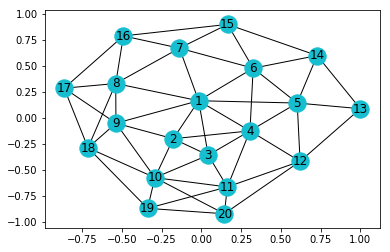

In [8]:
G.add_node(1,loyer=1144)
G.add_node(2,loyer=955)
G.add_node(3,loyer=993)
G.add_node(4,loyer=1206)
G.add_node(5,loyer=1004)
G.add_node(6,loyer=1009)
G.add_node(7,loyer=1031)
G.add_node(8,loyer=915)
G.add_node(9,loyer=950)
G.add_node(10,loyer=986)
G.add_node(11,loyer=864)
G.add_node(12,loyer=925)
G.add_node(13,loyer=905)
G.add_node(14,loyer=1084)
G.add_node(15,loyer=1064)
G.add_node(16,loyer=877)
G.add_node(17,loyer=918)
G.add_node(18,loyer=874)
G.add_node(19,loyer=965)
G.add_node(20,loyer=881)
G.add_edges_from([(1, 2), (1, 3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9)])
G.add_edges_from([(2, 3),(2,4),(2,9),(2,10)])
G.add_edges_from([(3, 4),(3,10),(3,11)])
G.add_edges_from([(4,5),(4,6),(4,11),(4,12)])
G.add_edges_from([(5,6),(5,12),(5,13),(5,14)])
G.add_edges_from([(6,7),(6,14),(6,15)])
G.add_edges_from([(7,8),(7,15),(7,16)])
G.add_edges_from([(8,9),(8,16),(8,17),(8,18)])
G.add_edges_from([(9,10),(9,17),(9,18)])
G.add_edges_from([(10,11),(10,18),(10,19),(10,20)])
G.add_edges_from([(11,12),(11,19),(11,20)])
G.add_edges_from([(12,13),(12,20)])
G.add_edges_from([(13,14)])
G.add_edges_from([(14,15)])
G.add_edges_from([(15,16)])
G.add_edges_from([(16,17)])
G.add_edges_from([(17,18)])
G.add_edges_from([(18,19)])
G.add_edges_from([(19,20)])
nx.draw_networkx(G,with_labels=True,node_color='tab:cyan');


In [9]:
def loyer(a):
    #Prend un arondissement et retourne son loyer
    
    loyer=nx.get_node_attributes(G,'loyer')
    return loyer[a]

In [10]:
print(loyer(1))
#liste_loyer=list(G.neighbors(1))
#print(liste_loyer)
#print(loyer(liste_loyer[0]))

1144


In [11]:
def comportement(liste_voisins,preference):
    #retourne l'indice du loyer qui est supérieur à un taux des autres loyers qui se rapproche du coefficient de preference de l'agent
    indice=0
    supérieur=0
    taux=0
    taux_proche=0
    loyer1=0
    
    for i in range(len(liste_voisins)):
        loyer1=loyer(liste_voisins[i])
    
        for arrondissement in liste_voisins:
            if loyer(arrondissement) < loyer1:
                supérieur= supérieur + 1  #nb d'arrondissement avec un loyer inférieur à l'arrondissement d'indice i
        taux=supérieur/(len(liste_voisins)-1)
        
        if taux_proche==0 or abs(preference-taux)< abs(preference-taux_proche):
            taux_proche=taux
            indice = i
        supérieur=0
    return indice

In [20]:
print(list(G.neighbors(1)))
print(comportement(list(G.neighbors(1)),0.5))
print(list(G.nodes(data=False)))

[2, 3, 4, 5, 6, 7, 8, 9]
1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [21]:
def demenagement(agent,alpha):
    #retourne le même agent avec son nouvel arrondissment
    liste_arrond=[]
    for arrond in list(G.neighbors(agent[0])):
        if loyer(arrond)<(agent[1]/36) and (loyer(arrond)*alpha)>(agent[1]/36):
            #liste_loyer.append(loyer[arrond])
            liste_arrond.append(arrond)
    if liste_arrond==[]:
        for arrond1 in list(G.nodes(data=False)):
            if loyer(arrond1)<(agent[1]/36) and (loyer(arrond1)*alpha)>(agent[1]/36):
                liste_arrond.append(arrond1)
        if liste_arrond==[]:
            return(0,agent[1],agent[2])
        elif len(liste_arrond)==1:
            return (liste_arrond[0], agent[1],agent[2])
        else:
            indice=comportement(liste_arrond,agent[2])
            return (liste_arrond[indice], agent[1],agent[2])
            
    elif len(liste_arrond)==1:
        return (liste_arrond[0], agent[1],agent[2])
    else:
        indice=comportement(liste_arrond,agent[2])
        return (liste_arrond[indice], agent[1],agent[2])

In [22]:
print(demenagement(dict_agent1[0],alpha))

(2, 45755.898582451344, 0.5)


In [23]:
def dynamique(dict_agent,alpha):
    #rend le dictionnaire d'agent au tour suivant
    
    for agent in dict_agent:
        RA=dict_agent[agent][1]
        A=dict_agent[agent][0]
        
        if A!=0:
            if (RA/36)<loyer(A) or (RA/36)>loyer(A)*alpha:
                dict_agent[agent]=demenagement(dict_agent[agent],alpha)
    return dict_agent

In [24]:
print(dict_agent1)
print(dynamique(dict_agent1,alpha))

{0: (1, 45755.898582451344, 0.5), 1: (1, 44032.010466692926, 0.5), 2: (1, 48633.01744047308, 0.5), 3: (1, 52224.37117334422, 0.5), 4: (1, 46804.721646397826, 0.5), 5: (1, 48619.39825363319, 0.5), 6: (2, 40229.16781676833, 0.5), 7: (2, 44742.939473719875, 0.5), 8: (2, 46476.85320547202, 0.5), 9: (2, 43509.46322360305, 0.5), 10: (2, 41478.67697768022, 0.5), 11: (2, 46107.53392967012, 0.5), 12: (2, 42727.81238975729, 0.5), 13: (2, 42808.998691308974, 0.5), 14: (3, 44510.84295123356, 0.5), 15: (3, 43515.73171868898, 0.5), 16: (3, 47394.36398224439, 0.5), 17: (3, 42167.06497535635, 0.5), 18: (3, 45114.149310585766, 0.5), 19: (3, 47396.28762950516, 0.5), 20: (3, 46754.4602253751, 0.5), 21: (3, 44763.59378403648, 0.5), 22: (3, 40579.38460505067, 0.5), 23: (3, 44678.47281563231, 0.5), 24: (3, 45520.51028209854, 0.5), 25: (3, 46041.56333196305, 0.5), 26: (4, 43709.21687655646, 0.5), 27: (4, 45818.060665854195, 0.5), 28: (4, 47135.80956741556, 0.5), 29: (4, 45907.49154478044, 0.5), 30: (4, 49155

{0: (2, 45755.898582451344, 0.5), 1: (2, 44032.010466692926, 0.5), 2: (2, 48633.01744047308, 0.5), 3: (3, 52224.37117334422, 0.5), 4: (2, 46804.721646397826, 0.5), 5: (2, 48619.39825363319, 0.5), 6: (10, 40229.16781676833, 0.5), 7: (2, 44742.939473719875, 0.5), 8: (2, 46476.85320547202, 0.5), 9: (2, 43509.46322360305, 0.5), 10: (2, 41478.67697768022, 0.5), 11: (2, 46107.53392967012, 0.5), 12: (2, 42727.81238975729, 0.5), 13: (2, 42808.998691308974, 0.5), 14: (3, 44510.84295123356, 0.5), 15: (3, 43515.73171868898, 0.5), 16: (3, 47394.36398224439, 0.5), 17: (3, 42167.06497535635, 0.5), 18: (3, 45114.149310585766, 0.5), 19: (3, 47396.28762950516, 0.5), 20: (3, 46754.4602253751, 0.5), 21: (3, 44763.59378403648, 0.5), 22: (10, 40579.38460505067, 0.5), 23: (3, 44678.47281563231, 0.5), 24: (3, 45520.51028209854, 0.5), 25: (3, 46041.56333196305, 0.5), 26: (6, 43709.21687655646, 0.5), 27: (2, 45818.060665854195, 0.5), 28: (2, 47135.80956741556, 0.5), 29: (2, 45907.49154478044, 0.5), 30: (2, 491

In [25]:
def evolution_loyer(dict_agent,G,mu):
    #prend le graphique des arrondissement et actualise les loyers
    somme_PL=0
    compteur_agent=0
    for a in range(20):
        for agent in dict_agent:
            if dict_agent[agent][0]==a+1:
                somme_PL=somme_PL+(dict_agent[agent][1]/36)
                compteur_agent=compteur_agent+1
        if compteur_agent!=0:
            moyenne_PL=somme_PL/compteur_agent
            G.node[a+1]['loyer']=G.node[a+1]['loyer']+mu*(moyenne_PL-G.node[a+1]['loyer'])
        somme_PL=0
        compteur_agent=0
    return G

In [18]:
def simulation(nb_tour,dict_agent1,G,mu,alpha):
    dict_agent=dict_agent1.copy()
    for i in range(nb_tour):
        dict_agent=dynamique(dict_agent,alpha)
        print(dict_agent)
        G=evolution_loyer(dict_agent,G,mu)
        for a in range(20):
            print((a+1,loyer(a+1)))
    return dict_agent

In [26]:
dict_agent1=(init_agent(nb_menage, facteur_echelle, revenu_median, sigma_revenu,preference))
G.add_node(1,loyer=1144)
G.add_node(2,loyer=955)
G.add_node(3,loyer=993)
G.add_node(4,loyer=1206)
G.add_node(5,loyer=1004)
G.add_node(6,loyer=1009)
G.add_node(7,loyer=1031)
G.add_node(8,loyer=915)
G.add_node(9,loyer=950)
G.add_node(10,loyer=986)
G.add_node(11,loyer=864)
G.add_node(12,loyer=925)
G.add_node(13,loyer=905)
G.add_node(14,loyer=1084)
G.add_node(15,loyer=1064)
G.add_node(16,loyer=877)
G.add_node(17,loyer=918)
G.add_node(18,loyer=874)
G.add_node(19,loyer=965)
G.add_node(20,loyer=881)
G.add_edges_from([(1, 2), (1, 3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9)])
G.add_edges_from([(2, 3),(2,4),(2,9),(2,10)])
G.add_edges_from([(3, 4),(3,10),(3,11)])
G.add_edges_from([(4,5),(4,6),(4,11),(4,12)])
G.add_edges_from([(5,6),(5,12),(5,13),(5,14)])
G.add_edges_from([(6,7),(6,14),(6,15)])
G.add_edges_from([(7,8),(7,15),(7,16)])
G.add_edges_from([(8,9),(8,16),(8,17),(8,18)])
G.add_edges_from([(9,10),(9,17),(9,18)])
G.add_edges_from([(10,11),(10,18),(10,19),(10,20)])
G.add_edges_from([(11,12),(11,19),(11,20)])
G.add_edges_from([(12,13),(12,20)])
G.add_edges_from([(13,14)])
G.add_edges_from([(14,15)])
G.add_edges_from([(15,16)])
G.add_edges_from([(16,17)])
G.add_edges_from([(17,18)])
G.add_edges_from([(18,19)])
G.add_edges_from([(19,20)])
print(simulation(5,dict_agent1,G,0.2, 1.5))

{0: (1, 49866.749723631554, 0.5), 1: (1, 47888.392489219426, 0.5), 2: (1, 48278.36230785961, 0.5), 3: (1, 47152.70071133855, 0.5), 4: (1, 47402.66782147934, 0.5), 5: (1, 48274.81813307442, 0.5), 6: (2, 47857.69840758672, 0.5), 7: (2, 43104.009145694814, 0.5), 8: (2, 42717.00627118661, 0.5), 9: (2, 46849.20888794077, 0.5), 10: (2, 41499.27720187263, 0.5), 11: (2, 46616.962607225636, 0.5), 12: (2, 44489.925170615876, 0.5), 13: (2, 42457.45063812948, 0.5), 14: (3, 43030.12218879694, 0.5), 15: (3, 43299.3892606738, 0.5), 16: (3, 44581.023661909705, 0.5), 17: (3, 45787.4500462613, 0.5), 18: (3, 45413.36963932867, 0.5), 19: (3, 44310.91735135689, 0.5), 20: (3, 45868.506747785934, 0.5), 21: (3, 41956.792719471596, 0.5), 22: (3, 44932.044851648585, 0.5), 23: (3, 42721.07658004551, 0.5), 24: (3, 46818.066135791596, 0.5), 25: (3, 42828.62194775819, 0.5), 26: (4, 45630.05372489941, 0.5), 27: (4, 45541.129112841736, 0.5), 28: (4, 43417.85906341999, 0.5), 29: (4, 44325.86010757956, 0.5), 30: (4, 44

(1, 1292.368022884829)
(2, 1055.0529517845061)
(3, 1077.792798939466)
(4, 1372.0360259194088)
(5, 1111.1735770398682)
(6, 1044.8490050400708)
(7, 1031)
(8, 927.3925106566986)
(9, 1068.634685443505)
(10, 1001.2344064632046)
(11, 922.9831168790781)
(12, 984.7867315668111)
(13, 928.5415555586665)
(14, 1107.8430383365605)
(15, 1146.5465313100206)
(16, 882.9209913762556)
(17, 1030.5015038149277)
(18, 885.7749579518804)
(19, 965)
(20, 890.7398136989948)
{0: (1, 49866.749723631554, 0.5), 1: (1, 47888.392489219426, 0.5), 2: (1, 48278.36230785961, 0.5), 3: (1, 47152.70071133855, 0.5), 4: (1, 47402.66782147934, 0.5), 5: (1, 48274.81813307442, 0.5), 6: (2, 47857.69840758672, 0.5), 7: (2, 43104.009145694814, 0.5), 8: (2, 42717.00627118661, 0.5), 9: (2, 46849.20888794077, 0.5), 10: (2, 41499.27720187263, 0.5), 11: (2, 46616.962607225636, 0.5), 12: (2, 44489.925170615876, 0.5), 13: (2, 42457.45063812948, 0.5), 14: (3, 43030.12218879694, 0.5), 15: (3, 43299.3892606738, 0.5), 16: (3, 44581.02366190970

{0: (1, 49866.749723631554, 0.5), 1: (2, 47888.392489219426, 0.5), 2: (2, 48278.36230785961, 0.5), 3: (2, 47152.70071133855, 0.5), 4: (2, 47402.66782147934, 0.5), 5: (2, 48274.81813307442, 0.5), 6: (2, 47857.69840758672, 0.5), 7: (2, 43104.009145694814, 0.5), 8: (2, 42717.00627118661, 0.5), 9: (2, 46849.20888794077, 0.5), 10: (2, 41499.27720187263, 0.5), 11: (2, 46616.962607225636, 0.5), 12: (2, 44489.925170615876, 0.5), 13: (2, 42457.45063812948, 0.5), 14: (3, 43030.12218879694, 0.5), 15: (3, 43299.3892606738, 0.5), 16: (3, 44581.023661909705, 0.5), 17: (3, 45787.4500462613, 0.5), 18: (3, 45413.36963932867, 0.5), 19: (3, 44310.91735135689, 0.5), 20: (3, 45868.506747785934, 0.5), 21: (3, 41956.792719471596, 0.5), 22: (3, 44932.044851648585, 0.5), 23: (3, 42721.07658004551, 0.5), 24: (3, 46818.066135791596, 0.5), 25: (3, 42828.62194775819, 0.5), 26: (6, 45630.05372489941, 0.5), 27: (6, 45541.129112841736, 0.5), 28: (2, 43417.85906341999, 0.5), 29: (6, 44325.86010757956, 0.5), 30: (6, 44

{0: (2, 49866.749723631554, 0.5), 1: (2, 47888.392489219426, 0.5), 2: (2, 48278.36230785961, 0.5), 3: (2, 47152.70071133855, 0.5), 4: (2, 47402.66782147934, 0.5), 5: (2, 48274.81813307442, 0.5), 6: (2, 47857.69840758672, 0.5), 7: (2, 43104.009145694814, 0.5), 8: (2, 42717.00627118661, 0.5), 9: (2, 46849.20888794077, 0.5), 10: (2, 41499.27720187263, 0.5), 11: (2, 46616.962607225636, 0.5), 12: (2, 44489.925170615876, 0.5), 13: (2, 42457.45063812948, 0.5), 14: (3, 43030.12218879694, 0.5), 15: (3, 43299.3892606738, 0.5), 16: (3, 44581.023661909705, 0.5), 17: (3, 45787.4500462613, 0.5), 18: (3, 45413.36963932867, 0.5), 19: (3, 44310.91735135689, 0.5), 20: (3, 45868.506747785934, 0.5), 21: (3, 41956.792719471596, 0.5), 22: (3, 44932.044851648585, 0.5), 23: (3, 42721.07658004551, 0.5), 24: (3, 46818.066135791596, 0.5), 25: (3, 42828.62194775819, 0.5), 26: (6, 45630.05372489941, 0.5), 27: (6, 45541.129112841736, 0.5), 28: (2, 43417.85906341999, 0.5), 29: (6, 44325.86010757956, 0.5), 30: (6, 44